<a href="https://colab.research.google.com/github/mohaddese136/forex-RL-trading-bot/blob/main/RL_trading_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow gym-anytrading gym stable-baselines

  Using cached ale_py-0.7.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
  Attempting uninstall: ale-py
    Found existing installation: ale-py 0.8.1
    Uninstalling ale-py-0.8.1:
      Successfully uninstalled ale-py-0.8.1


In [ ]:
!pip install "stable-baselines3[extra]>=2.0.0a4"

  Using cached ale_py-0.8.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.7 MB)
  Attempting uninstall: ale-py
    Found existing installation: ale-py 0.7.5
    Uninstalling ale-py-0.7.5:
      Successfully uninstalled ale-py-0.7.5


In [ ]:
pip install yahoo_fin

In [ ]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf

In [ ]:
stock='BTC-USD'
data = yf.download(stock, "2017-01-01", "2023-01-01",interval="1d")
df= pd.DataFrame(data=data)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/loc

In [ ]:
env.signal_features

array([[ 9.98325012e+02,  0.00000000e+00],
       [ 1.02175000e+03,  2.34249878e+01],
       [ 1.04383997e+03,  2.20899658e+01],
       [ 1.15472998e+03,  1.10890015e+02],
       [ 1.01338000e+03, -1.41349976e+02],
       [ 9.02200989e+02, -1.11179016e+02],
       [ 9.08585022e+02,  6.38403320e+00],
       [ 9.11198975e+02,  2.61395264e+00],
       [ 9.02828003e+02, -8.37097168e+00],
       [ 9.07679016e+02,  4.85101318e+00],
       [ 7.77757019e+02, -1.29921997e+02],
       [ 8.04833984e+02,  2.70769653e+01],
       [ 8.23984009e+02,  1.91500244e+01],
       [ 8.18411987e+02, -5.57202148e+00],
       [ 8.21797974e+02,  3.38598633e+00],
       [ 8.31533997e+02,  9.73602295e+00],
       [ 9.07937988e+02,  7.64039917e+01],
       [ 8.86617981e+02, -2.13200073e+01],
       [ 8.99072998e+02,  1.24550171e+01],
       [ 8.95026001e+02, -4.04699707e+00],
       [ 9.21789001e+02,  2.67630005e+01],
       [ 9.24672974e+02,  2.88397217e+00],
       [ 9.21012024e+02, -3.66094971e+00],
       [ 8.

info {'total_reward': 174.79803466796875, 'total_profit': 0.8758871497015452, 'position': 1}


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the envir

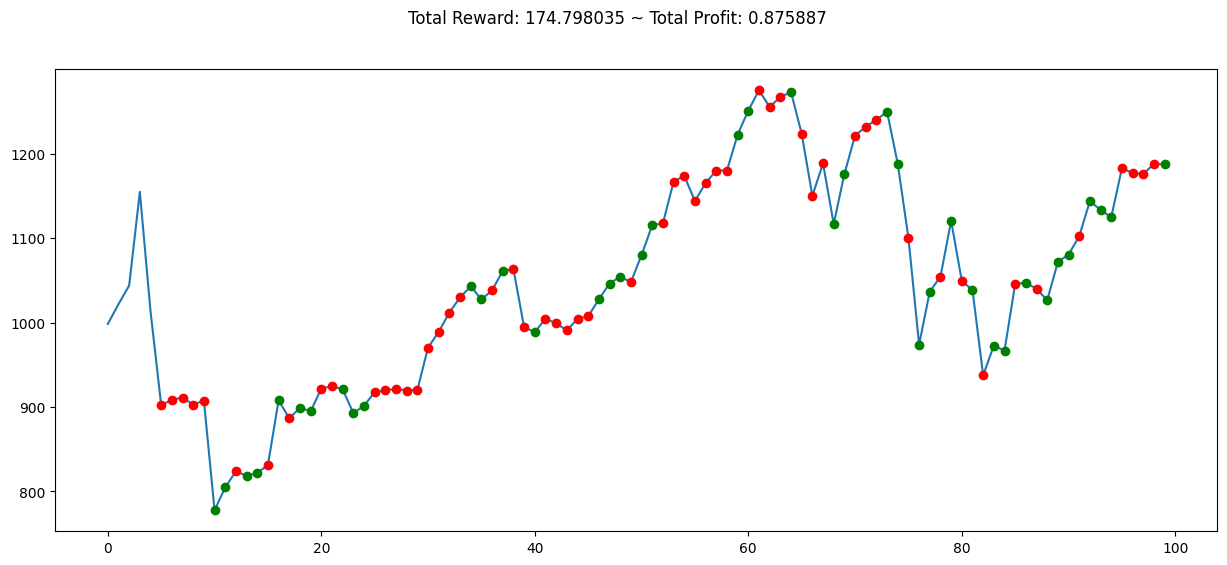

In [ ]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [ ]:
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
|    value_loss         | 2.89e+03 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 408       |
|    iterations         | 164400    |
|    time_elapsed       | 2012      |
|    total_timesteps    | 822000    |
| train/                |           |
|    entropy_loss       | -0.692    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 164399    |
|    policy_loss        | -5.35     |
|    value_loss         | 197       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 408      |
|    iterations         | 164500   |
|    time_elapsed       | 2014     |
|    total_timesteps    | 822500   |
| train/                |          |
|    entropy_loss       | -0.674   |
|    explained_variance | 0        |
|    learn

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -2.780029296875, 'total_profit': 0.953257788544408, 'position': 1}


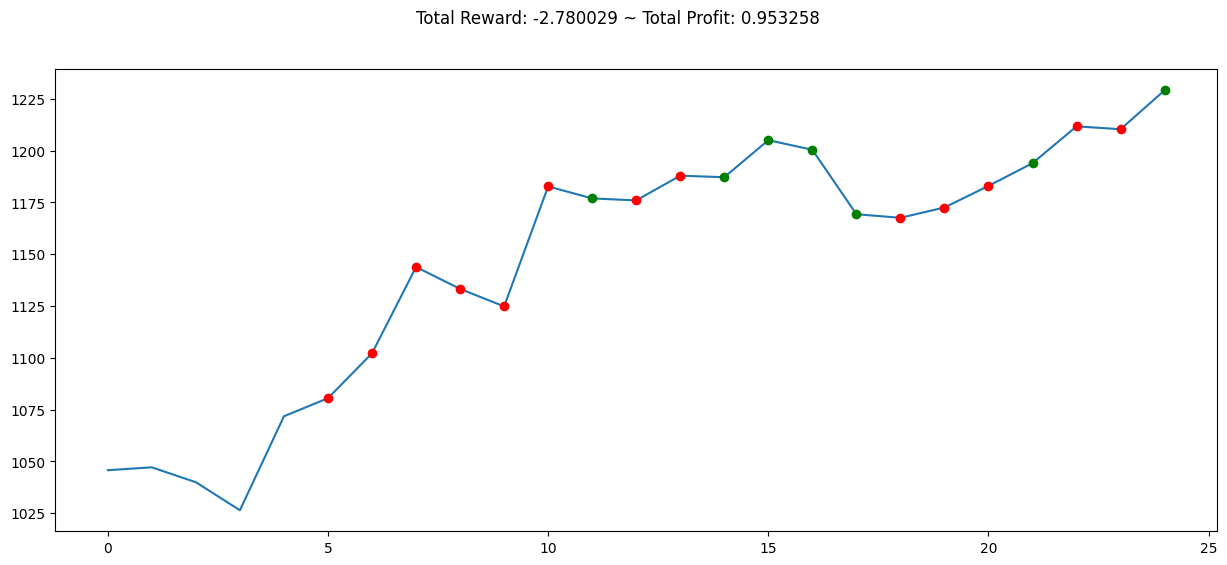

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()